In [ ]:
#먼저 실행해주세요

pip install fake_useragent
from fake_useragent import UserAgent
ua = UserAgent()

# Get a random browser user-agent string
print(ua.random)

# Or get user-agent string from a specific browser
print(ua.chrome)
# Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36
print(ua.google)
# Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_4) AppleWebKit/537.13 (KHTML, like Gecko) Chrome/24.0.1290.1 Safari/537.13
print(ua['google chrome'])
# Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36
print(ua.firefox)
# Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/115.0
print(ua.ff)
# Mozilla/5.0 (X11; Linux x86_64; rv:102.0) Gecko/20100101 Firefox/102.0
print(ua.safari)
# Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.2 Safari/605.1.15


from fake_useragent import UserAgent
ua = UserAgent(browsers=['edge', 'chrome'])
ua.random


#코랩 한글설정

%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:123.0) Gecko/20100101 Firefox/123.0 Config/92.2.7601.2
Mozilla/5.0 (Linux; Android 10; K) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Mobile Safari/537.36
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36
Mozilla/5.0 (Linux; Android 10; K) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Mobile Safari/537.36
Mozilla/5.0 (X11; Linux x86_64; rv:123.0) Gecko/20100101 Firefox/123.0
Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:123.0) Gecko/20100101 Firefox/123.0
Mozilla/5.0 (iPad; CPU OS 17_0_3 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.0 Mobile/15E148 Safari/605.1.15


'Mozilla/5.0 (iPhone; CPU iPhone OS 17_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) EdgiOS/119.0.2151.105 Version/17.0 Mobile/15E148 Safari/604.1'

In [ ]:
#호텔 1일 체크인 가격 크롤링 #올마이투어
from bs4 import BeautifulSoup
import urllib
from urllib.request import urlopen, Request

#체크인 조회 일자 입력
chekin_date = input("'2000-01-01' 형식으로 체크인 날짜를 입력해 주세요: ")

#올마이투어에서 데이터가 조회되는 호텔
hotel_name_allmytour = ['더리버사이드호텔', '호텔 안테룸', '호텔 파티오세븐', '호텔 선샤인 서울', '호텔 티롤', 'LEX관광호텔']

#올마이투어에서 데이터가 조회되는 호텔의 기초주소
base_url = ['https://www.allmytour.com/products/2967?checkInDate=', #더리버사이드호텔
        'https://www.allmytour.com/products/5403?checkInDate=', #호텔 안테룸
        'https://www.allmytour.com/products/284?checkInDate=', #호텔 파티오세븐
            'https://www.allmytour.com/products/284?checkInDate=', #호텔 티롤
            'https://www.allmytour.com/products/284?checkInDate=', #호텔 선샤인
            'https://www.allmytour.com/products/1234770?checkInDate=' #LEX관광호텔
            ]

print('------------------------------------')
#반복문을 활용하여 올마이투어에서 조회되는 호텔 가격 정보 크롤링
for i in range(len(hotel_name_allmytour)):
  html = base_url[i] + chekin_date #기초주소에 날짜정보 추가
  req = Request(html, headers={'User-Agent':ua.random,}) #해당 주소로 Request 모듈 사용하여 조회 요청
  response = urlopen(req) #urlopen 사용하여 응답받은 url 페이지 열기
  soup = BeautifulSoup(response, 'html.parser') #해당 페이지 내용을 BeautifulSoup을 통하여 html 조회

  try:
     price = soup.find('span', class_='tw-text-subtitle1 tw-font-bold tw-text-grey-g10 tw-flex tw-items-center').text.strip(' ~')
     #span 태그에서 가격 정보를 담은 클래스 찾아 가공
     print(hotel_name_allmytour[i],' 1일 숙박가: ',price, sep='')
     #조회된 정보 출력

  except:
    print(hotel_name_allmytour[i],' 1일 숙박가: ','만실입니다', sep='')  #가격 정보가 없을 경우 지정된 문구 출력

print('------------------------------------')
print('작업을 완료하였습니다. ')

'2000-01-01' 형식으로 체크인 날짜를 입력해 주세요: 2024-08-16
------------------------------------
더리버사이드호텔 1일 숙박가: 만실입니다
호텔 안테룸 1일 숙박가: 205,500원
호텔 파티오세븐 1일 숙박가: 179,500원
호텔 선샤인 서울 1일 숙박가: 179,500원
호텔 티롤 1일 숙박가: 179,500원
LEX관광호텔 1일 숙박가: 169,300원
------------------------------------
작업을 완료하였습니다. 


In [ ]:
#호텔 월별 체크인 가격 크롤링 후 엑셀파일 만들기 #올마이투어
import urllib
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request

chekin_month = input("'2000-01' 형식으로 체크인 연월를 입력해 주세요: ")
print(' ')
days = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10','11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']
dates = [chekin_month + '-' + i for i in days]

hotel_name_allmytour = ['더리버사이드호텔', '호텔 안테룸', '호텔 파티오세븐', '호텔 선샤인 서울', '호텔 티롤', 'LEX관광호텔']
base_url_allmytour = ['https://www.allmytour.com/products/2967?checkInDate=', #더리버사이드호텔
        'https://www.allmytour.com/products/5403?checkInDate=', #호텔 안테룸
        'https://www.allmytour.com/products/284?checkInDate=', #호텔 파티오세븐
            'https://www.allmytour.com/products/284?checkInDate=', #호텔 티롤
            'https://www.allmytour.com/products/284?checkInDate=', #호텔 선샤인
            'https://www.allmytour.com/products/1234770?checkInDate=' #LEX관광호텔
            ]

prices_riverside = []; prices_anteroom = []; prices_patio7 = []
prices_sunshine = []; prices_tiroll = [] ; prices_lextouristhotel = []
prices_allmytour = [prices_riverside, prices_anteroom, prices_patio7, prices_sunshine, prices_tiroll, prices_lextouristhotel]

print('------------------------------------------------------------------------')
print('올마이투어에서 가격 정보를 수집합니다')
for i in tqdm(range(len(hotel_name_allmytour))):
  for j in range(len(days)):
    html_allmytour = base_url_allmytour[i] + chekin_month + '-' + days[j]
    req_allmytour = Request(html_allmytour)
    response_allmytour = urlopen(req_allmytour)
    soup_allmytour = BeautifulSoup(response_allmytour, 'html.parser')

    try:
          price_allmytour = soup_allmytour.find('span', class_='tw-text-subtitle1 tw-font-bold tw-text-grey-g10 tw-flex tw-items-center').text.strip('원 ~')
          prices_allmytour[i].append(price_allmytour)

    except:
       prices_allmytour[i].append(0)

print('올마이투어 가격 정보 수집이 완료되었습니다: 더리버사이드호텔, 호텔 안테룸, 호텔 파티오세븐, 호텔 선샤인 서울, 호텔 티롤, LEX관광호텔')
print(' ')

print('------------------------------------------------------------------------')
print(' ')

date_df = pd.DataFrame(data=dates)
date_df.columns = ['날짜']

df_allmytour = pd.DataFrame(data=prices_allmytour).transpose()
df_allmytour.columns = hotel_name_allmytour
df_allmytour = date_df.join(df_allmytour)
df_allmytour.set_index(keys='날짜', inplace=True)

df_allmytour.to_excel('/content/drive/MyDrive/경쟁사_가격_비교.xlsx')

print('파일을 저장하였습니다. 구글드라이브를 확인해 주세요: 경쟁사_가격_비교.xlsx')
print('https://drive.google.com/drive/home')



'2000-01' 형식으로 체크인 연월를 입력해 주세요: 2024-08
 
------------------------------------------------------------------------
올마이투어에서 가격 정보를 수집합니다


100%|██████████| 6/6 [05:17<00:00, 52.88s/it]

올마이투어 가격 정보 수집이 완료되었습니다: 더리버사이드호텔, 호텔 안테룸, 호텔 파티오세븐, 호텔 선샤인 서울, 호텔 티롤, LEX관광호텔
 
------------------------------------------------------------------------
 


KeyError: "None of ['날짜'] are in the columns"

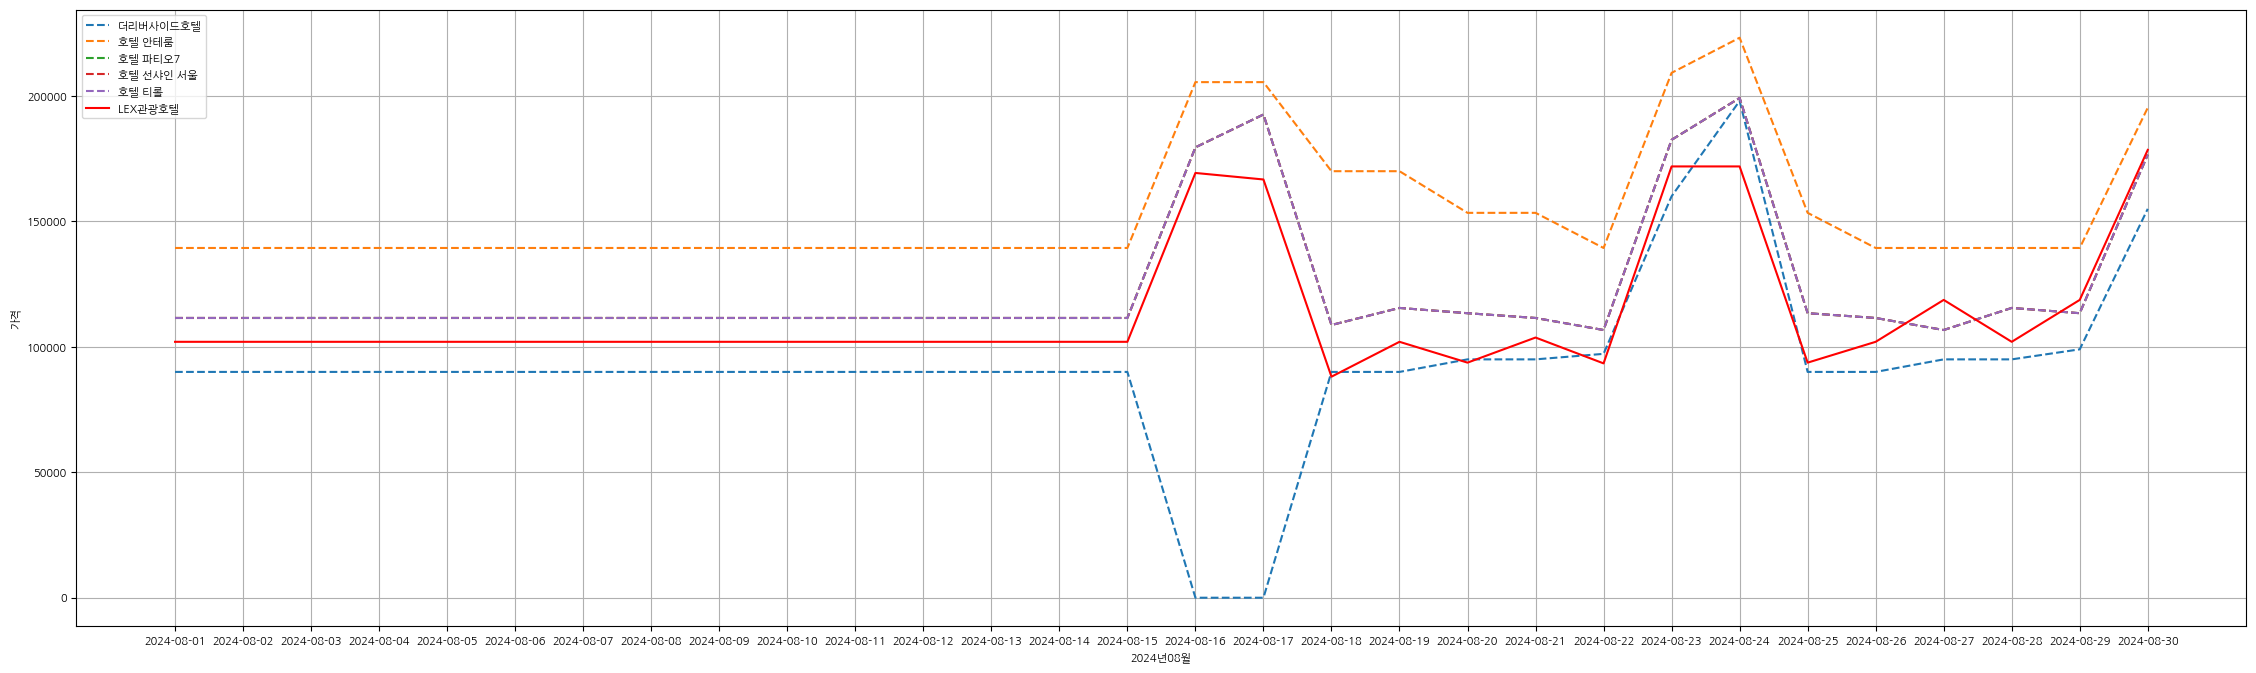

In [21]:
#그래프 시각화 (2번 실행해야 합니다)
# https://post.naver.com/viewer/postView.naver?volumeNo=31655657&memberNo=21815&vType=VERTICAL
# !! https://wikidocs.net/92071 참조 !!

import matplotlib.pyplot as plt
import numpy as np

all_hotel_names = hotel_name_allmytour
all_hotel_prices = prices_allmytour

prices_riverside2 = []; prices_anteroom2 = []; prices_patio72 = []; prices_sunshine2 = []; prices_tiroll2 = [] ; prices_lextouristhotel2 = []
all_hotel_prices2 = [prices_riverside2, prices_anteroom2, prices_patio72, prices_sunshine2, prices_tiroll2, prices_lextouristhotel2]

for i in range(len(all_hotel_prices2)):
  for j in range(len(days)):
    try:
      all_hotel_prices2[i].append(int(all_hotel_prices[i][j].replace(',', '')))

    except:
      all_hotel_prices2[i].append(0)

plt.plot(dates, prices_riverside2,'--',label='더리버사이드호텔')
plt.plot(dates, prices_anteroom2,'--',label='호텔 안테룸')
plt.plot(dates, prices_patio72,'--',label='호텔 파티오7')
plt.plot(dates, prices_sunshine2,'--',label='호텔 선샤인 서울')
plt.plot(dates, prices_tiroll2,'--',label='호텔 티롤',)
plt.plot(dates, prices_lextouristhotel2, 'r-',label='LEX관광호텔')

chekin_month_label = chekin_month.replace('-', '년') + '월'
plt.xlabel(chekin_month_label)
plt.ylabel('가격')

plt.rcParams['figure.figsize'] = (28, 8)
plt.rcParams['font.size'] = 8

plt.grid(True)
plt.legend()

plt.savefig('/content/drive/MyDrive/prices_of_hotels.png', facecolor='#eeeeee')
plt.show()


